In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import re

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
print(df.shape)
print(df.head())

(40789, 40)
   Unnamed: 0              Title  Year      Rated    Released  Runtime  \
0           1  39 Pounds of Love  2005    UNRATED  2005-04-08   70 min   
1           2               3:am  2005  NOT RATED  2005-01-25   21 min   
2           3    500 Years Later  2005        NaN  2005-02-24  106 min   
3           4          5th World  2005        NaN  2005-01-20   75 min   
4           5                 90  2005        NaN  2005-03-12   14 min   

                             Genre            Director  \
0  Documentary, Biography, Romance         Dani Menkin   
1                  Short, Thriller       Ryan Bradford   
2                      Documentary  Owen Alik Shahadah   
3                   Drama, Romance     Blackhorse Lowe   
4                       War, Short          Jason Wise   

                         Writer  \
0     Ilan Heitner, Dani Menkin   
1  Ryan Bradford, Ryen Schlegel   
2                   M.K. Asante   
3               Blackhorse Lowe   
4                  

In [4]:
print(df.describe())

          Unnamed: 0          Year    Metascore    imdbRating     imdbVotes  \
count   40789.000000  40789.000000  5210.000000  39535.000000  3.949700e+04   
mean    25116.814877   1980.954963    54.784261      6.252146  1.205867e+04   
std     24214.945395     25.020166    18.049470      1.207422  5.702163e+04   
min         1.000000   1888.000000     1.000000      1.000000  5.000000e+00   
25%     10414.000000   1962.000000    42.000000      5.600000  6.100000e+01   
50%     20691.000000   1989.000000    55.000000      6.400000  2.140000e+02   
75%     31696.000000   2001.000000    68.000000      7.100000  1.343000e+03   
max    112382.000000   2018.000000   100.000000      9.800000  1.684836e+06   

       tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten  \
count  9458.000000   9448.000000    9502.000000  9502.000000   9502.000000   
mean     58.579192      5.874968      57.375289    34.281309     23.093980   
std      28.856973      1.527928      63.167701    46.

In [5]:
df['Type'].value_counts()

movie     40000
series      725
game         64
Name: Type, dtype: int64

In [6]:
movies=df[df['Type']=="movie"]

In [7]:
print(sum(movies['Genre'].isnull()))
movies['Genre'].fillna('Drama',inplace=True)
print(sum(movies['Genre'].isnull()))

986
0


/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
movies.shape

(40000, 40)

# Get Minutes 

In [9]:
import re
def get_minutes(x):
    x=str(x)
    m=float('nan')
    m=re.match(r"(\d+)\s+h+(\d+)\s+m\w+",x)
    if m is not None:
        m=float(m.groups()[0]*60+m.groups()[1])
    m=re.match(r"(\d+)\s+m\w+",x)
    if m is not None:
        m=float(m.groups()[0])
    return m

In [10]:
movies['Runtime']=list(map(get_minutes,movies['Runtime']))

/Users/saarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Histogram

In [11]:
print(sum(movies['Runtime'].isnull()))
movies['Runtime'].fillna(np.mean(movies['Runtime']),inplace=True)
print(sum(movies['Runtime'].isnull()))

902
0


/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
movies['Runtime'].describe()

count    40000.000000
mean        81.748632
std         37.886912
min          1.000000
25%         72.000000
50%         90.000000
75%        100.000000
max        873.000000
Name: Runtime, dtype: float64

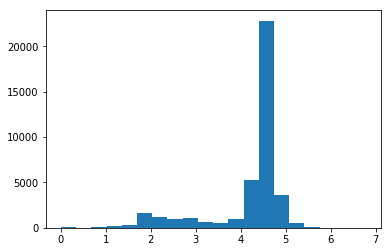

In [13]:
plt.hist(np.log(movies['Runtime']),bins=20)
plt.show()

In [14]:
print(sum(movies['Budget'].isnull()))
movies['Budget'].fillna(np.mean(movies['Budget']),inplace=True)
print(sum(movies['Budget'].isnull()))

35442
0


/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


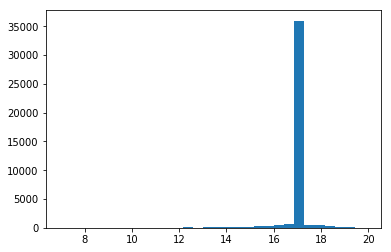

In [15]:
plt.hist(np.log(movies['Budget']),bins=30)
plt.show()

In [16]:
movies['Year'].describe()

count    40000.000000
mean      1980.604450
std         25.057727
min       1888.000000
25%       1961.000000
50%       1989.000000
75%       2001.000000
max       2018.000000
Name: Year, dtype: float64

In [17]:
print(sum(movies['Year'].isnull()))

0


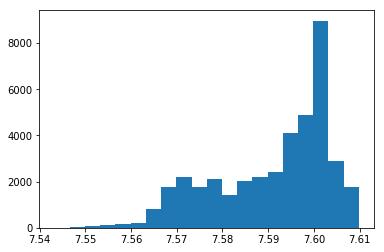

In [18]:
plt.hist(np.log(movies['Year']),bins=20)
plt.show()

# Wins and Nominations

In [19]:
import re
def nominations(a):
    a=str(a).lower()
    nom_1=0
    nom_2=0
    nom=0
    n1=re.findall(r"nominated\sfor\s\d+",a,re.I|re.M)
    n2=re.findall(r"\d+\s+nomination\w+",a,re.I|re.M)
    
    if(len(n1)>0):
        nom_1=int(re.match(r"\w+\s+\w+\s+(\d+)",n1[0]).groups()[0])
    if(len(n2)>0):
        nom_2=int(re.match(r"(\d+)\s+\w+",n2[0]).groups()[0])
    nom=nom_1+nom_2
    return nom

In [20]:
movies['Nominations']=list(map(nominations,movies['Awards']))

/Users/saarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
import re
def wins(a):
    a=str(a).lower()
    win1=0
    win2=0
    win=0
    w1=re.findall(r"won\s\d+",a,re.I|re.M)
    w2=re.findall(r"\d+\s+wins\w+",a,re.I|re.M)
    
    if(len(w1)>0):
        win1=int(re.match(r"\w+\s+(\d+)",w1[0]).groups()[0])
    if(len(w2)>0):
        win2=int(re.match(r"(\d+)\s+\w+",w2[0]).groups()[0])
    win=win1+win2
    return win

In [22]:
movies['Wins']=list(map(wins,movies['Awards']))

/Users/saarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Genre Segregation

In [23]:
type(df['Genre'])

pandas.core.series.Series

In [24]:
new_all=[]
all_genres=[]
unique_all=[]
for i in movies['Genre']:
        new_all.append(str(i).split(','))
new_all=list(chain(*new_all))
for i in new_all:
    all_genres.append(i.strip())
unique_all=set(all_genres)


In [25]:
unique_all

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [26]:
d={}
for i in unique_all:
    d[i]=[]
    for j in movies['Genre']:
        j=str(j).strip()
        if i in j:
            d[i].append(1)
        else:
            d[i].append(0)

In [27]:
sum(d['War'])

1070

In [28]:
for keys in d.keys():
    #for i in range(len(movies['Genre'])):
    list_key=pd.Series(d[keys])
        #movies[keys].loc[i]=d[keys][i]
    movies[keys]=d[keys]    
    #movies.insert(loc=0,column=keys,value=d[keys])    

/Users/saarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
sum(movies['War'])

1070

# Top Genres

In [30]:
new_all=[]
all_genres=[]
unique_all=[]
for i in movies['Genre']:
        new_all.append(str(i).split(','))
new_all=list(chain(*new_all))
for i in new_all:
    all_genres.append(i.strip())
unique_all=set(all_genres)

In [31]:
count={}
for i in unique_all:
    count[i]=1
    for j in new_all:
        if i in j:
            count[i]=count[i]+1
print(count)

{'War': 1071, 'Adult': 423, 'Game-Show': 3, 'Thriller': 3381, 'Comedy': 12850, 'Action': 4414, 'Sci-Fi': 1625, 'Animation': 2789, 'Drama': 16846, 'Western': 1315, 'Crime': 4063, 'Music': 2572, 'Fantasy': 1401, 'Talk-Show': 5, 'Mystery': 1643, 'Film-Noir': 353, 'Romance': 4976, 'Reality-TV': 7, 'News': 21, 'Horror': 2717, 'Biography': 1110, 'Adventure': 2929, 'Documentary': 3052, 'Musical': 1388, 'Short': 6517, 'History': 831, 'Family': 2654, 'Sport': 526}


In [32]:
sorted_count=sorted(count.items(),key=lambda x:x[1],reverse=True)
print(sorted_count)
top10=sorted_count[0:10]
print(top10)

[('Drama', 16846), ('Comedy', 12850), ('Short', 6517), ('Romance', 4976), ('Action', 4414), ('Crime', 4063), ('Thriller', 3381), ('Documentary', 3052), ('Adventure', 2929), ('Animation', 2789), ('Horror', 2717), ('Family', 2654), ('Music', 2572), ('Mystery', 1643), ('Sci-Fi', 1625), ('Fantasy', 1401), ('Musical', 1388), ('Western', 1315), ('Biography', 1110), ('War', 1071), ('History', 831), ('Sport', 526), ('Adult', 423), ('Film-Noir', 353), ('News', 21), ('Reality-TV', 7), ('Talk-Show', 5), ('Game-Show', 3)]
[('Drama', 16846), ('Comedy', 12850), ('Short', 6517), ('Romance', 4976), ('Action', 4414), ('Crime', 4063), ('Thriller', 3381), ('Documentary', 3052), ('Adventure', 2929), ('Animation', 2789)]


In [33]:
x=[]
name=[]
for i in range(len(top10)):
    x.append(top10[i][1])
    name.append(top10[i][0])
print(x)
print(name)

[16846, 12850, 6517, 4976, 4414, 4063, 3381, 3052, 2929, 2789]
['Drama', 'Comedy', 'Short', 'Romance', 'Action', 'Crime', 'Thriller', 'Documentary', 'Adventure', 'Animation']


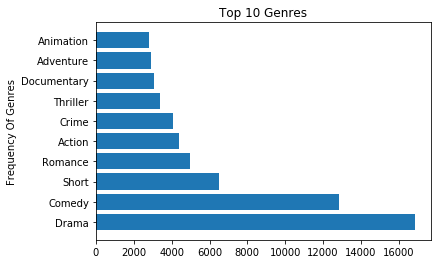

In [34]:
y_pos = np.arange(len(name))
 
plt.barh(y_pos, x, align='center', alpha=1)
plt.yticks(y_pos, name)
plt.ylabel('Frequency Of Genres')
plt.title('Top 10 Genres')
 
plt.show()

# Corrrelation and Scatter Plot

0.22642553772991497


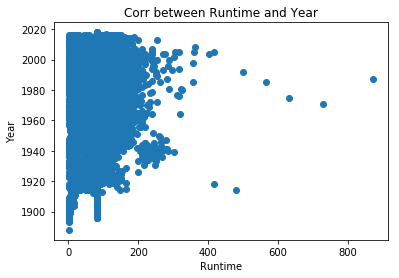

In [35]:
print(movies['Runtime'].corr(movies['Year']))
plt.scatter(movies['Runtime'],movies['Year'])
plt.xlabel("Runtime")
plt.ylabel("Year")
plt.title("Corr between Runtime and Year")
plt.show()

0.7419124839791145


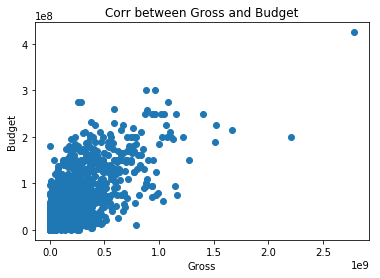

In [36]:
print(movies['Gross'].corr(movies['Budget']))
plt.scatter(movies['Gross'],movies['Budget'])
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.title("Corr between Gross and Budget")
plt.show()

0.2124445013949441


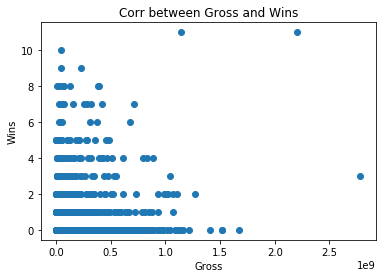

In [37]:
print(movies['Gross'].corr(movies['Wins']))
plt.scatter(movies['Gross'],movies['Wins'])
plt.xlabel("Gross")
plt.ylabel("Wins")
plt.title("Corr between Gross and Wins")
plt.show()

0.3652119180248889


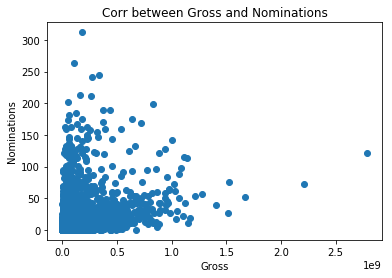

In [38]:
print(movies['Gross'].corr(movies['Nominations']))
plt.scatter(movies['Gross'],movies['Nominations'])
plt.xlabel("Gross")
plt.ylabel("Nominations")
plt.title("Corr between Gross and Nominations")
plt.show()

0.7938417239203803


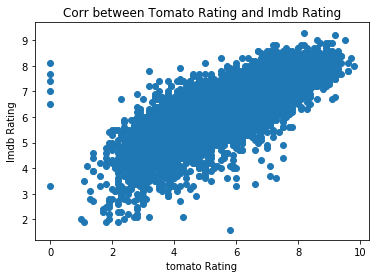

In [39]:
print(movies['tomatoRating'].corr(movies['imdbRating']))
plt.scatter(movies['tomatoRating'],movies['imdbRating'])
plt.xlabel("tomato Rating")
plt.ylabel("Imdb Rating")
plt.title("Corr between Tomato Rating and Imdb Rating")
plt.show()

0.0279600146353651


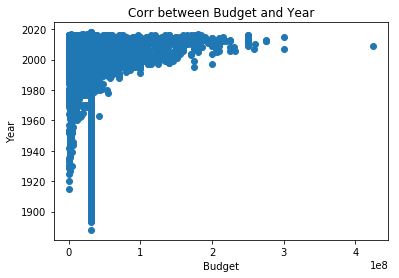

In [40]:
print(movies['Budget'].corr(movies['Year']))
plt.scatter(movies['Budget'],movies['Year'])
plt.xlabel("Budget")
plt.ylabel("Year")
plt.title("Corr between Budget and Year")
plt.show()

# Gross Value Missing

In [41]:
sum(movies['Gross'].isnull())

35442

In [42]:
movies.dropna(subset=['Gross'],inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
print(sum(movies['Gross'].isnull()))
print(movies.shape)

0
(4558, 70)


# Movies Greater than Year 2000

In [44]:
movies=movies[movies['Year']>2000]

In [45]:
movies['Year'].describe()

count    3163.000000
mean     2008.402466
std         4.370154
min      2001.000000
25%      2005.000000
50%      2008.000000
75%      2012.000000
max      2017.000000
Name: Year, dtype: float64

# Getting only Numerical Values

In [46]:
movies_new=movies.select_dtypes(include='number')

In [47]:
print(movies.shape)
print(movies_new.shape)
movies_new.describe()

(3163, 70)
(3163, 48)


,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,News,Horror,Biography,Adventure,Documentary,Musical,Short,History,Family,Sport
count,3163.000000,3163.000000,3163.000000,2746.000000,3120.000000,3.120000e+03,2775.000000,2775.000000,2776.000000,2776.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,70401.246601,2008.402466,104.336927,52.924982,6.294904,8.530600e+04,51.945225,5.607387,127.347983,73.070245,...,0.000632,0.106861,0.061018,0.170724,0.039519,0.010117,0.006323,0.027189,0.071135,0.027822
std,49777.371473,4.370154,19.230381,17.651252,1.102757,1.328866e+05,27.468142,1.447502,67.324916,63.502042,...,0.025142,0.308985,0.239401,0.376327,0.194858,0.100089,0.079279,0.162661,0.257091,0.164488
min,13.000000,2001.000000,1.000000,1.000000,1.600000,5.000000e+00,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13076.500000,2005.000000,92.000000,40.000000,5.700000,8.949500e+03,29.000000,4.500000,81.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110317.000000,2008.000000,101.000000,53.000000,6.400000,3.682600e+04,52.000000,5.600000,128.500000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111134.500000,2012.000000,114.000000,66.000000,7.100000,1.021338e+05,76.000000,6.700000,171.000000,111.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111998.000000,2017.000000,219.000000,100.000000,9.000000,1.670736e+06,100.000000,9.200000,355.000000,343.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removing Null Values

In [48]:
movies_new['Metascore'].describe()
print(sum(movies_new['Metascore'].isnull()))

417


In [49]:
movies_new['Metascore'].fillna(np.mean(movies_new['Metascore']),inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [50]:
movies_new['imdbRating'].describe()
movies_new['imdbRating'].value_counts()
sum(movies_new['imdbRating'].isnull())

43

In [51]:
movies_new['imdbRating'].fillna(np.mean(movies_new['imdbRating']),inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [52]:
movies_new['imdbVotes'].describe()
movies_new['imdbVotes'].value_counts()
sum(movies_new['imdbVotes'].isnull())

43

In [53]:
movies_new['imdbVotes'].fillna(np.mean(movies_new['imdbVotes']),inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
movies_new['tomatoMeter'].describe()
movies_new['tomatoMeter'].value_counts()
sum(movies_new['tomatoMeter'].isnull())

388

In [55]:
movies_new['tomatoMeter'].fillna(np.mean(movies_new['tomatoMeter']),inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [56]:
movies_new['tomatoFresh'].fillna(np.mean(movies_new['tomatoFresh']),inplace=True)
movies_new['tomatoRating'].fillna(np.mean(movies_new['tomatoRating']),inplace=True)
movies_new['tomatoRotten'].fillna(np.mean(movies_new['tomatoRotten']),inplace=True)
movies_new['tomatoUserMeter'].fillna(np.mean(movies_new['tomatoUserMeter']),inplace=True)
movies_new['tomatoUserRating'].fillna(np.mean(movies_new['tomatoUserRating']),inplace=True)
movies_new['tomatoUserReviews'].fillna(np.mean(movies_new['tomatoUserReviews']),inplace=True)
movies_new['tomatoReviews'].fillna(np.mean(movies_new['tomatoReviews']),inplace=True)

/Users/saarthak/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [57]:
X=movies_new.loc[:,movies_new.columns !='Gross']
X.head()

,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,News,Horror,Biography,Adventure,Documentary,Musical,Short,History,Family,Sport
12,13,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,...,0,1,0,0,0,0,0,0,0,0
20,21,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,...,0,0,0,1,0,0,0,0,1,0
26,27,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,...,0,0,0,0,0,0,0,0,0,0
27,28,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,...,0,0,0,0,0,0,0,0,0,0
28,29,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
X=X.loc[:,X.columns !='Unnamed: 0']
#X=X.reset_index()
#X=X.loc[:,X.columns !='index']
X.head()

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,...,News,Horror,Biography,Adventure,Documentary,Musical,Short,History,Family,Sport
12,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,116.0,...,0,1,0,0,0,0,0,0,0,0
20,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,103.0,...,0,0,0,1,0,0,0,0,1,0
26,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,119.0,...,0,0,0,0,0,0,0,0,0,0
27,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,72.0,...,0,0,0,0,0,0,0,0,0,0
28,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,55.0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
Y=movies_new['Gross']
Y.head()
Y.describe()

count    3.163000e+03
mean     9.565995e+07
std      1.795087e+08
min      0.000000e+00
25%      2.376027e+06
50%      2.988264e+07
75%      1.022844e+08
max      2.783919e+09
Name: Gross, dtype: float64

In [60]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.head())
print(Y_train.head())
print(X_train.shape)

       Year  Runtime  Metascore  imdbRating  imdbVotes  tomatoMeter  \
39402  2009    115.0       49.0         6.6   285502.0         33.0   
39787  2007    100.0       78.0         7.0   211995.0         70.0   
10136  2009     99.0       56.0         7.2    29127.0         64.0   
40186  2004     93.0       47.0         5.7     3791.0         61.0   
6491   2004    104.0       65.0         7.3   168149.0         68.0   

       tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten  ...    News  \
39402           5.0          268.0         88.0         180.0  ...       0   
39787           6.6          186.0        131.0          55.0  ...       0   
10136           6.0          128.0         82.0          46.0  ...       0   
40186           6.0           67.0         41.0          26.0  ...       0   
6491            6.6          203.0        138.0          65.0  ...       0   

       Horror  Biography  Adventure  Documentary  Musical  Short  History  \
39402       0          0   

/Users/saarthak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
X.shape

(3163, 46)

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression(normalize=True)
model_linear.fit(X_train, Y_train)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
coeffecients: [-4.07397201e+06  2.98429531e+04  1.36034676e+05  9.87551915e+05
  3.45385386e+01  1.89399738e+05 -1.45542209e+06  6.65014910e+17
 -6.65014910e+17 -6.65014910e+17 -2.37112819e+05  6.28734794e+06
 -4.50613330e-01  7.95079982e-01  2.04958197e+00  5.91595050e+06
  7.83500535e+04  7.41256801e+06 -6.75609203e+06  2.69550279e+07
 -9.33042999e+17  2.10874633e+06 -1.09940618e+07 -5.07538396e+06
 -3.15590250e+06  8.12546206e+06 -3.48378950e+05 -1.78270632e+07
 -4.66592426e+06  1.73917020e+06  8.61863528e+06 -1.10141160e+16
 -2.37677309e+06 -3.40998839e+15  4.96747904e+06 -4.02237610e+13
 -1.80823301e+07  2.58759445e+06 -9.11761446e+06  9.44507918e+06
  7.62071139e+06  7.75766502e+06  2.06986856e+07 -8.34795626e+05
 -6.97200297e+06 -2.55726806e+07]
Intercept: -3727377409.9080353


In [63]:
print('R squared value:', model_linear.score(X_test, Y_test))

R squared value: 0.9171104272939532


In [64]:
check=pd.read_csv("check.csv")

In [71]:
check

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,...,Short,Comedy,Documentary,Drama,Western,Adult,Horror,Talk-Show,Thriller,Action
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,120 min,12.0,6.0,201.0,25.0,4.0,60.0,20.0,29.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
check=check.drop(0,axis=0)

In [73]:
check.shape

(1, 46)

In [78]:
check['Runtime']=120
check['Mystery']=0

In [79]:
check

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,...,Short,Comedy,Documentary,Drama,Western,Adult,Horror,Talk-Show,Thriller,Action
1,2018.0,120,12.0,6.0,201.0,25.0,4.0,60.0,20.0,29.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Gross_new=model_linear.predict(check)

In [82]:
print(Gross_new)

[7.31512379e+18]


In [64]:
train_set=list(range(1,2400,200))
print(train_set)
print(type(train_set))
train_set.append(2530)
print(train_set)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [65]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X,
                                                   y = Y, train_sizes = train_set, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [66]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     1.261240e+15
401     2.441264e+15
601     2.450539e+15
801     2.428710e+15
1001    2.603220e+15
1201    2.885042e+15
1401    2.786037e+15
1601    2.808316e+15
1801    2.838685e+15
2001    2.776394e+15
2201    2.708004e+15
2530    2.626402e+15
dtype: float64

 ----------------------------------------

Mean validation scores

 1       7.098710e+16
201     4.079537e+15
401     3.964585e+15
601     3.344180e+15
801     3.095917e+15
1001    2.918631e+15
1201    2.997242e+15
1401    2.972188e+15
1601    2.938928e+15
1801    2.897074e+15
2001    2.897190e+15
2201    2.873631e+15
2530    2.842141e+15
dtype: float64


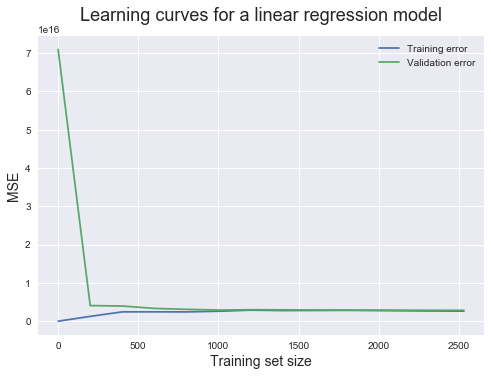

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set, train_scores_mean, label = 'Training error')
plt.plot(train_set, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

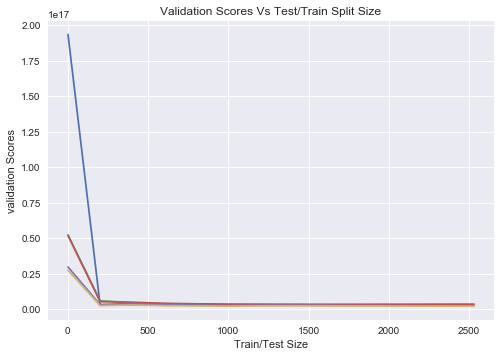

In [68]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

In [69]:
Y_predictions = model_linear.predict(X_test)
#Y_predictions[Y_predictions<0]=0
print(Y_predictions)

[  1.10918387e+08   4.34800781e+06   1.48113422e+07   2.93102102e+07
   3.36837666e+07   5.78207480e+07  -3.05293421e+06   1.29687944e+07
   4.16183012e+08  -7.72271876e+06   3.88877384e+07   1.26797108e+08
   4.68636341e+08   8.90960800e+07   1.10340788e+08   7.89180081e+08
  -1.68086907e+07  -1.88532888e+07   9.04458231e+08   4.10818191e+07
   8.16379507e+07   3.72292119e+08   8.95280572e+07   4.65036377e+07
  -3.59810175e+07   1.43715293e+08   1.01667137e+07   2.66683965e+08
   1.48194395e+06   2.26157320e+08  -9.22327125e+06  -2.80794059e+05
  -1.78384889e+07   2.11375659e+08  -2.12986321e+07   1.03645964e+08
  -1.76121710e+07   1.62656136e+07  -1.40732829e+07   1.43634843e+07
   3.92641737e+07   1.32796013e+08   8.48955474e+06   5.39408848e+06
  -2.94372377e+06  -1.03836248e+07   5.61587448e+06  -7.93239125e+06
   1.83948363e+06  -1.58150943e+07   1.23556072e+07   2.06226294e+06
   4.46282530e+08  -1.60996026e+07   4.46813427e+08   9.03452891e+06
   2.42335194e+07   4.65743101e+06

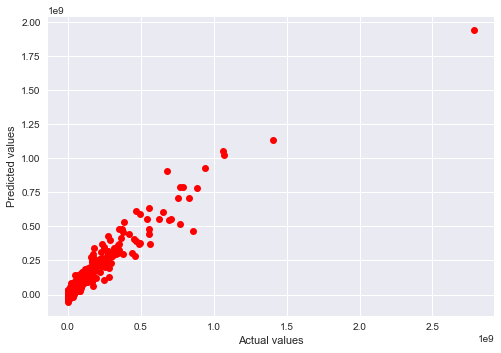

In [70]:
plt.plot(Y_test, Y_predictions,'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# BoxCox Transformation

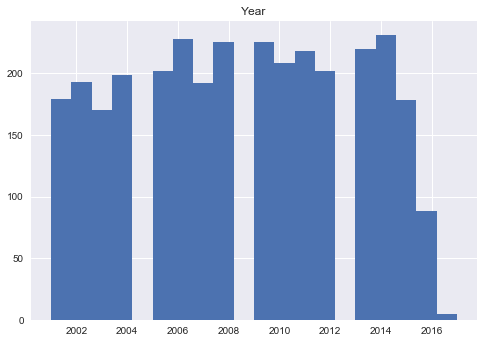

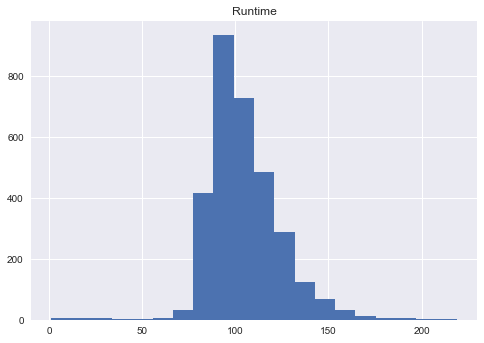

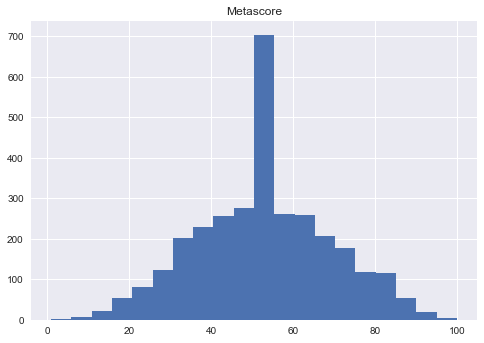

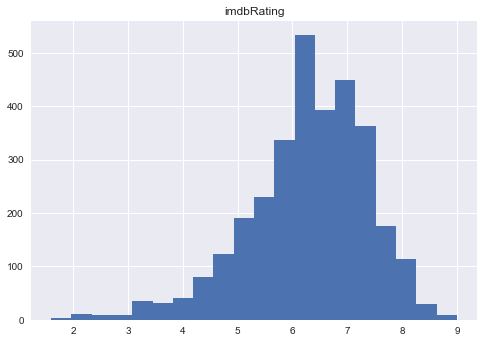

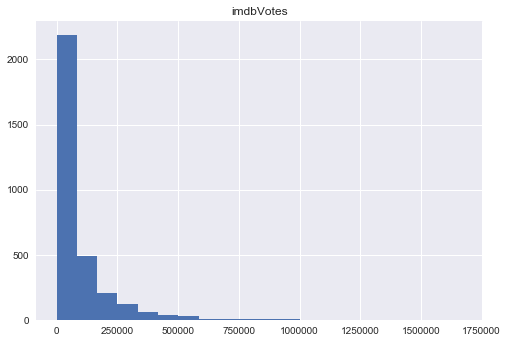

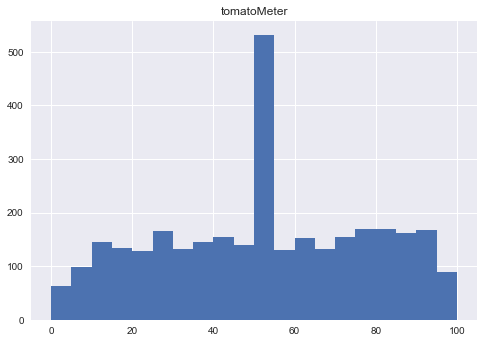

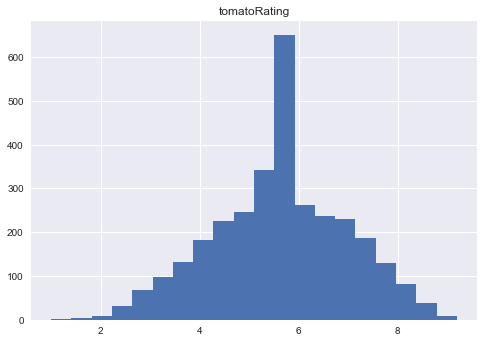

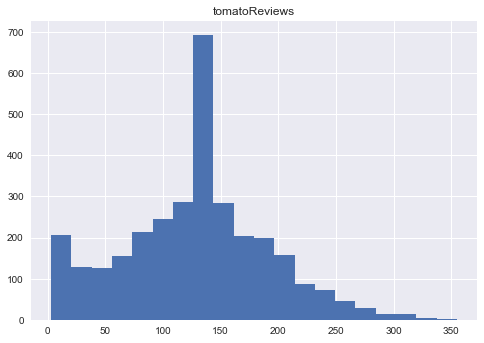

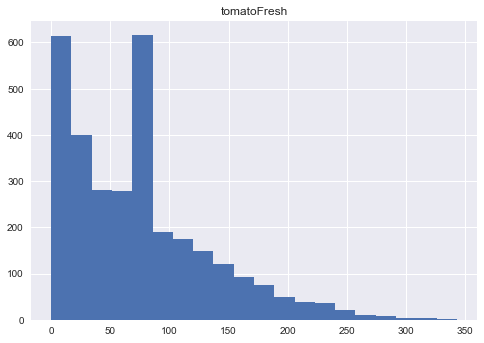

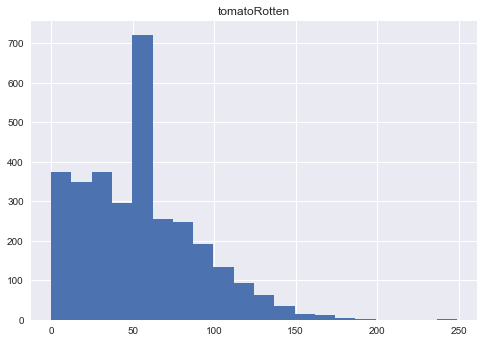

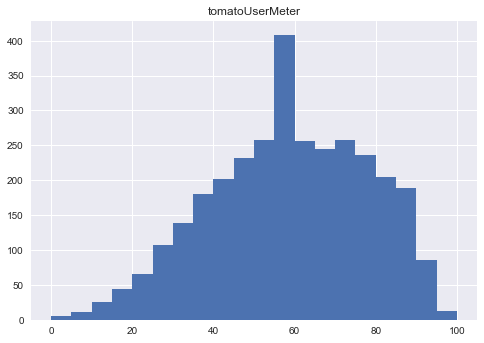

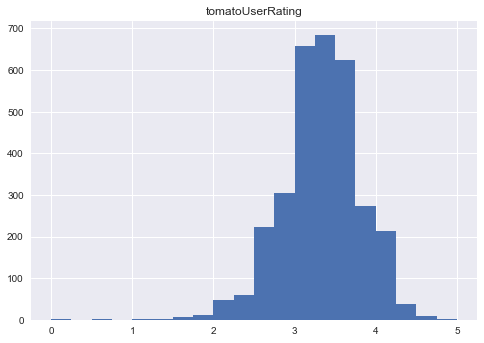

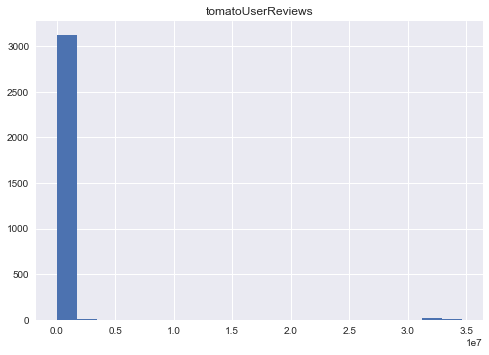

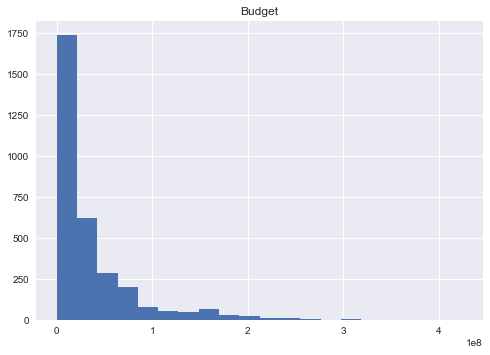

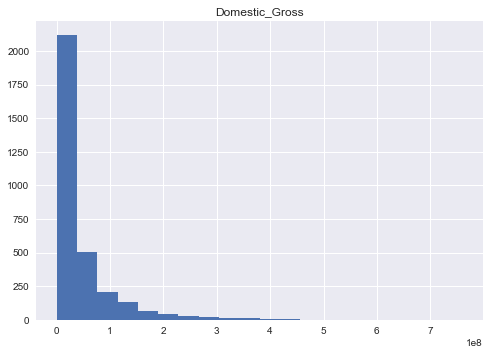

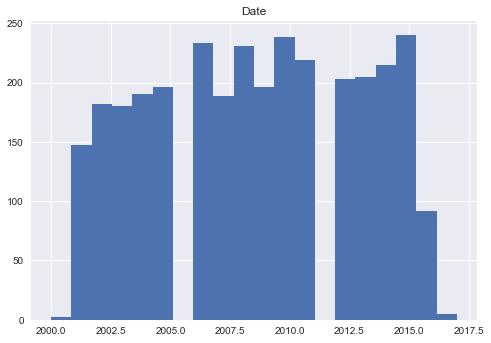

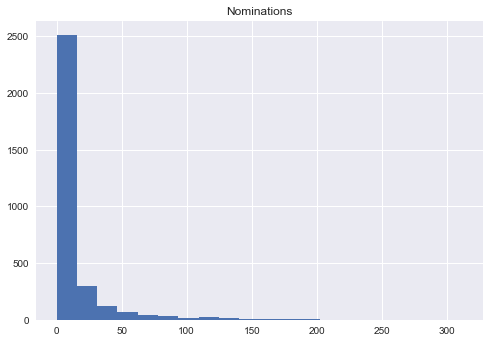

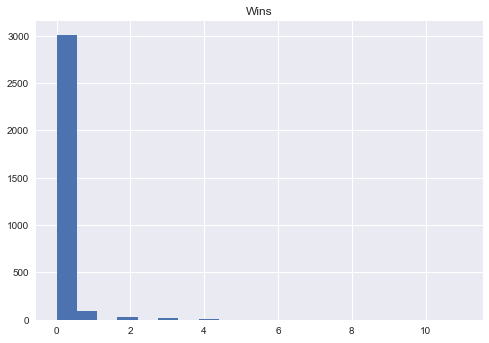

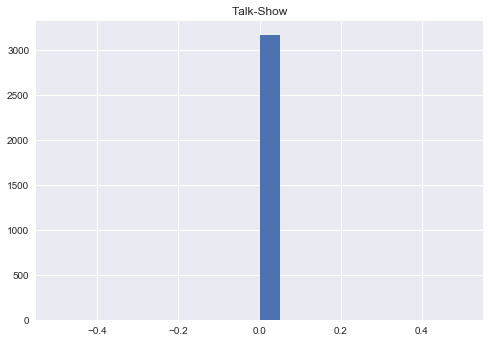

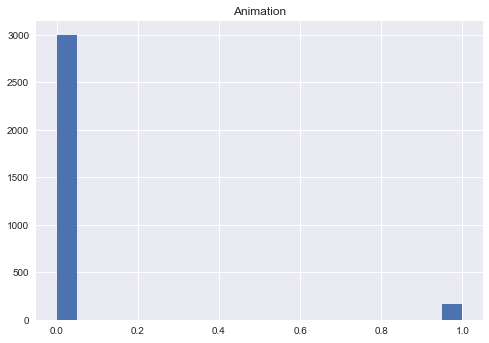

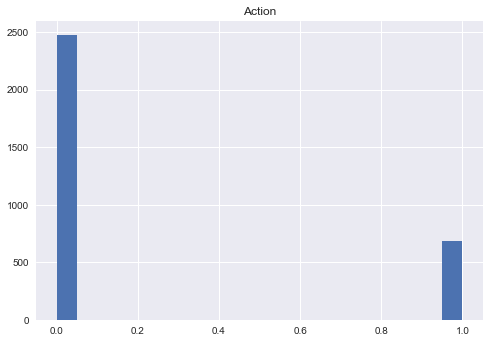

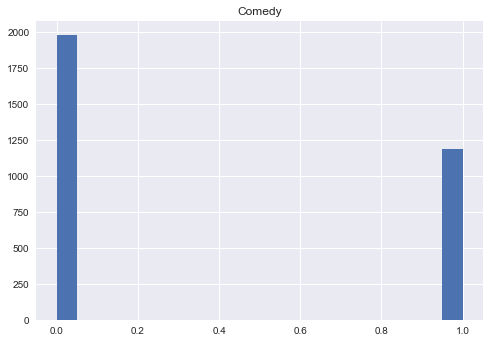

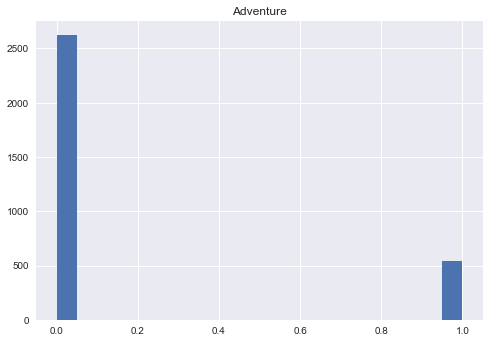

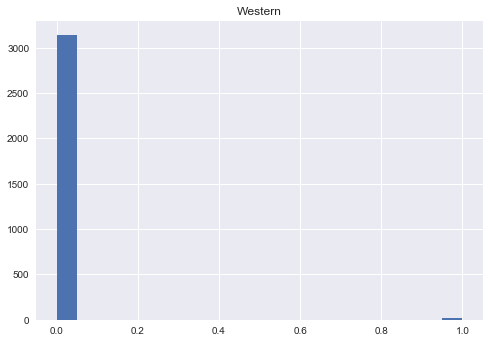

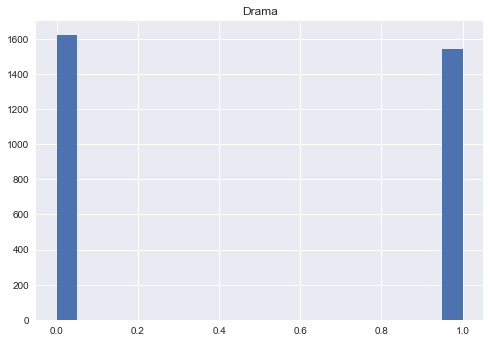

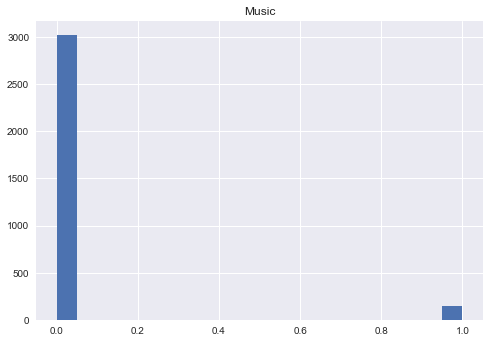

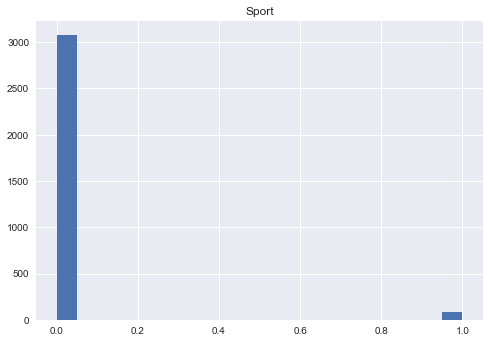

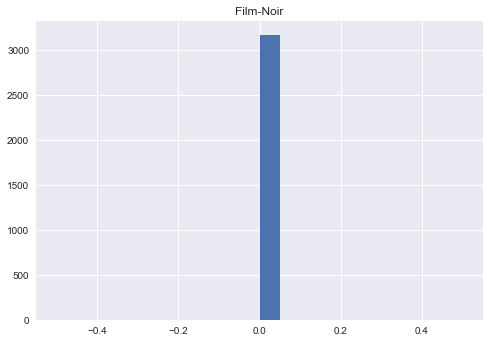

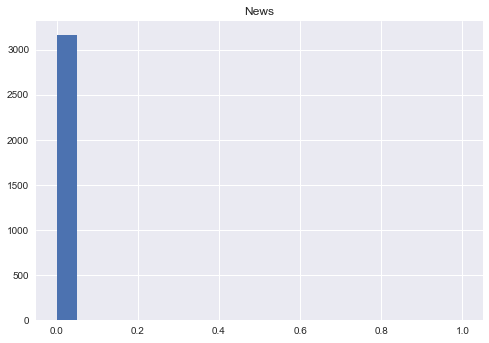

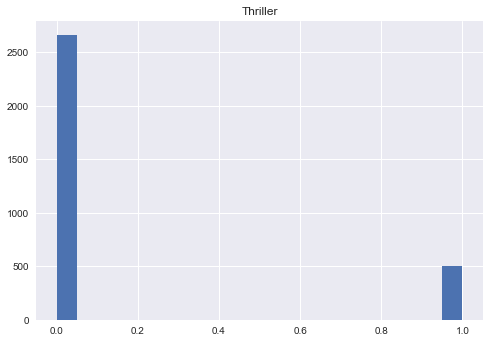

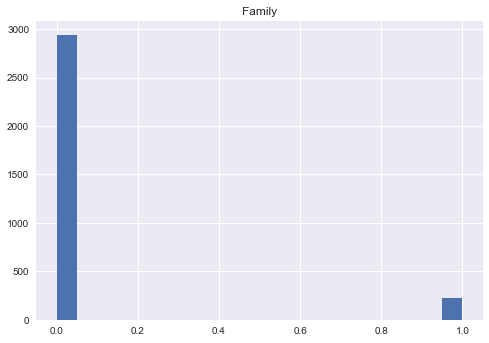

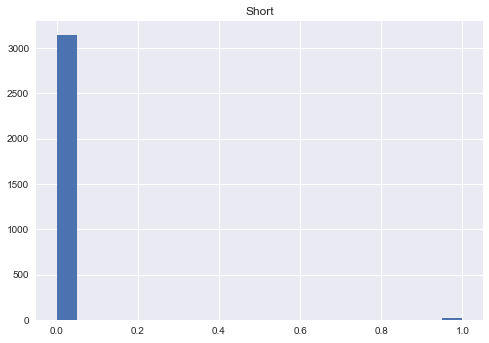

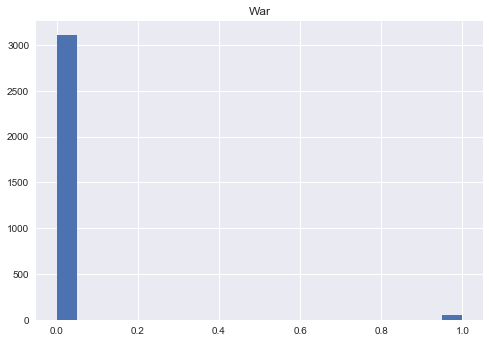

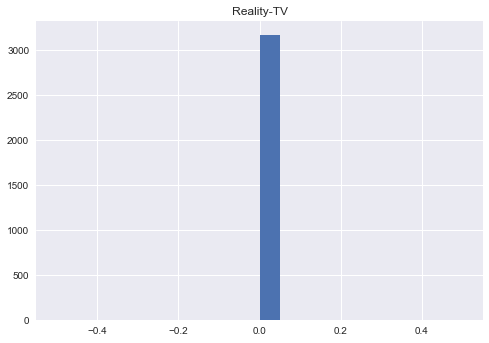

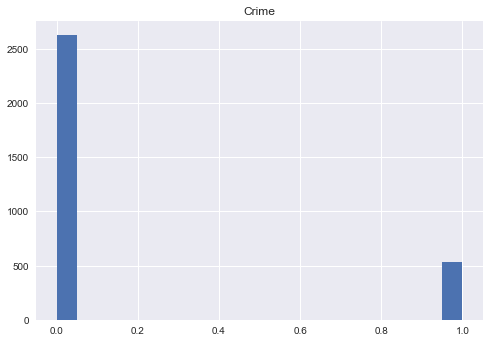

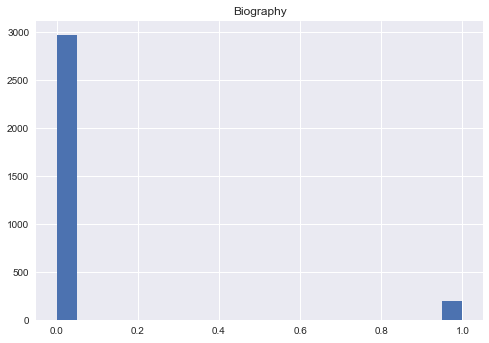

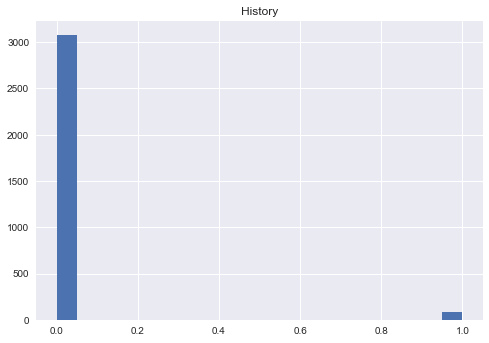

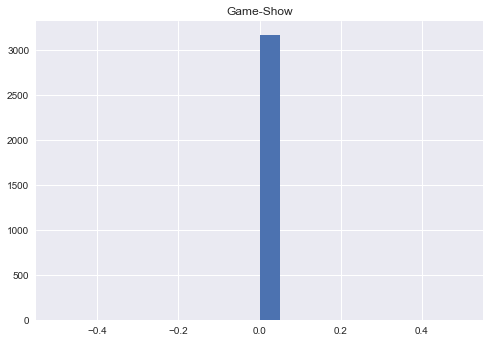

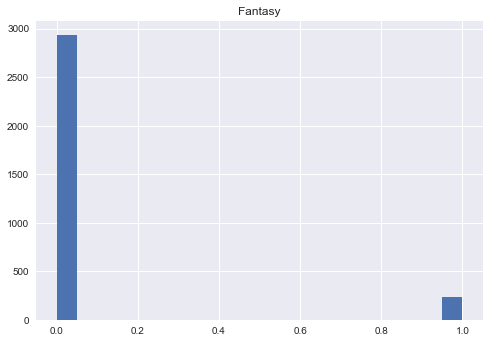

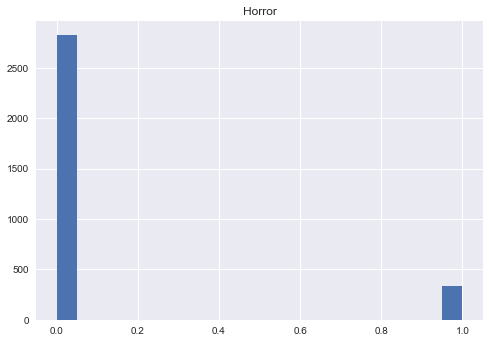

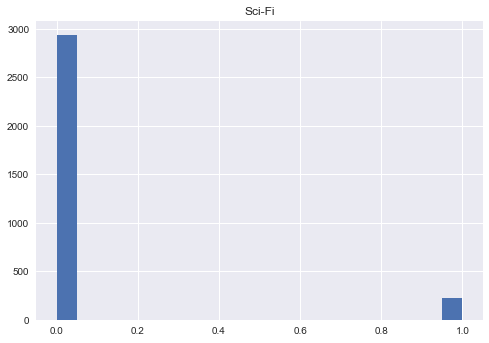

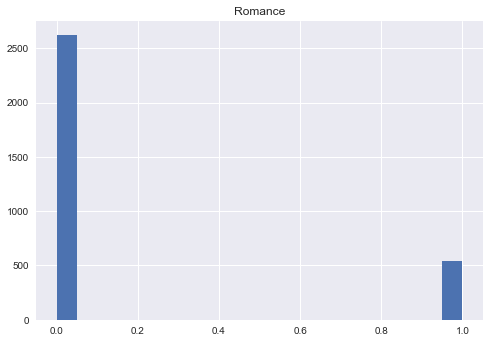

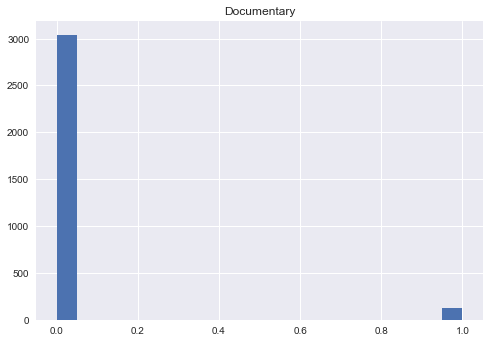

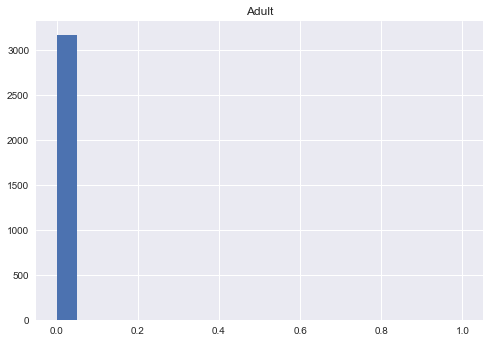

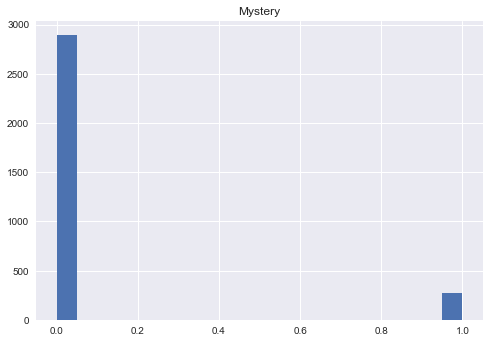

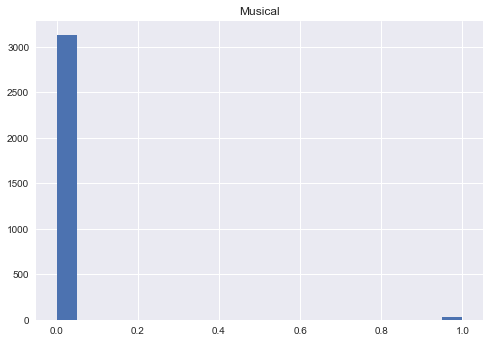

In [71]:
for x in list(X.columns):
    plt.hist(X[x], bins=20)
    plt.title(x)
    plt.show()

In [72]:
from scipy import stats
XT = X.copy()

l=['Year','Runtime','Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'tomatoRating', 'tomatoReviews', 'Budget', 'Date']

print(l)
for i in l:
    XT[i] = stats.boxcox(X[i])[0]
    print(i,np.min(XT[i]))



['Year', 'Runtime', 'Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'tomatoRating', 'tomatoReviews', 'Budget', 'Date']
Year 1.9857534366e+35
Runtime 0.0
Year 1.9857534366e+35
Runtime 0.0
Metascore 0.0
imdbRating 0.834617286995
imdbVotes 1.89272577598
tomatoRating 0.0
tomatoReviews 1.7787678602
Budget 16.3366186591
Date 6.00131201157e+52


In [73]:
XT['tomatoMeter'].describe()

count    3163.000000
mean       51.945225
std        25.727736
min         0.000000
25%        32.000000
50%        51.945225
75%        73.000000
max       100.000000
Name: tomatoMeter, dtype: float64

In [74]:
from sklearn.cross_validation import train_test_split
XT_train, XT_test, Y_train, Y_test = train_test_split(XT, Y, test_size=0.2, random_state=42)
print(XT_train.head())
print(Y_train.head())

               Year     Runtime  Metascore  imdbRating  imdbVotes  \
39402  2.074915e+35  123.535636  41.696726   30.473692  54.893328   
39787  2.052290e+35  106.974710  65.506066   34.845162  51.488156   
10136  2.074915e+35  105.872435  47.493761   37.151762  33.228335   
40186  2.018772e+35   99.263822  40.033403   21.794534  20.586820   
6491   2.018772e+35  111.386118  54.896992   38.335528  48.972003   

       tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten  \
39402         33.0      4.614194     116.480760         88.0         180.0   
39787         70.0      6.657590      86.126105        131.0          55.0   
10136         64.0      5.882173      63.152381         82.0          46.0   
40186         61.0      5.882173      36.720615         41.0          26.0   
6491          68.0      6.657590      92.592763        138.0          65.0   

        ...     History  Game-Show  Fantasy  Horror  Sci-Fi  Romance  \
39402   ...           0          0        0 

In [75]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression(normalize=True)
model_linear.fit(XT_train, Y_train)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
coeffecients: [ -2.76886968e-27   2.79947240e+05   3.26964862e+04   7.21393394e+05
  -3.79566800e+05   3.32091874e+05  -2.22639393e+06  -2.42938670e+06
   9.68746123e+05   1.16339204e+06  -3.76106073e+05   4.53102830e+06
  -6.92951398e-01   1.02743130e+05   2.27827779e+00   9.16147220e-45
   6.18224415e+04   7.07597277e+06   0.00000000e+00   2.24367334e+07
   4.35344446e+06  -1.17067498e+07   2.60010533e+07  -1.36271778e+07
  -4.35335876e+06   1.50409539e+06  -2.30536671e+07   0.00000000e+00
  -2.03979061e+07   3.06657343e+06  -3.62992362e+06   3.39714844e+07
  -4.24780494e+06  -3.87430191e-07  -3.58507712e+06  -1.24709581e+07
  -2.17700693e+05   3.57627869e-07   1.90309415e+07   9.69943849e+05
   6.11467105e+06   5.24502271e+06   6.70876414e+06   4.04542588e+07
  -2.63016400e+06   3.02141056e+06]
Intercept: -61191254.2086


In [76]:
print('R squared value:', model_linear.score(XT_test, Y_test))

R squared value: 0.904818315326


In [77]:
train_set=list(range(1,2400,200))
print(train_set)
print(type(train_set))
train_set.append(2530)
print(train_set)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [78]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = XT,
                                                   y = Y, train_sizes = train_set, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [79]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     2.633518e+16
401     3.795460e+16
601     3.378996e+16
801     3.455942e+16
1001    3.582755e+16
1201    3.880547e+16
1401    3.737748e+16
1601    3.674139e+16
1801    3.602118e+16
2001    3.537382e+16
2201    3.391072e+16
2530    3.210668e+16
dtype: float64

 ----------------------------------------

Mean validation scores

 1       7.098710e+16
201     3.657803e+16
401     3.862308e+16
601     3.626139e+16
801     3.383075e+16
1001    3.385290e+16
1201    3.373221e+16
1401    3.301351e+16
1601    3.260011e+16
1801    3.247574e+16
2001    3.235167e+16
2201    3.228187e+16
2530    3.225157e+16
dtype: float64


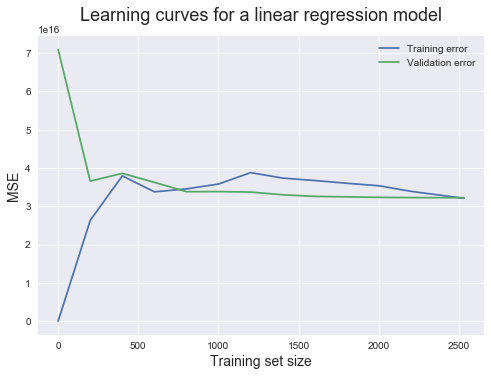

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set, train_scores_mean, label = 'Training error')
plt.plot(train_set, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

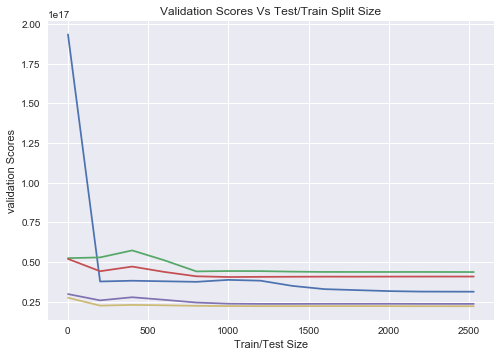

In [81]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

# Categorical to Discrete Data

In [82]:
movies_new=movies.copy()

In [83]:
def getvalues(a):
    new_all=[]
    all_genres=[]
    unique_all=[]
    for i in a:
        new_all.append(str(i).split(','))
    new_all=list(chain(*new_all))
    for i in new_all:
        all_genres.append(i.strip())
    unique_all=set(all_genres)
    d={}
    for i in unique_all:
        d[i]=[]
        for j in a:
            j=str(j).strip()
            if i in j:
                d[i].append(1)
            else:
                d[i].append(0)
    return(d)

In [84]:
country=getvalues(movies['Country'])
print(sum(country['USA']))

2749


In [85]:
def addindataframe(d):
    for keys in d.keys():
    #for i in range(len(movies['Genre'])):
        list_key=pd.Series(d[keys])
        #movies[keys].loc[i]=d[keys][i]
        movies_new[keys]=d[keys]    
    #movies.insert(loc=0,column=keys,value=d[keys])

In [86]:
addindataframe(getvalues(movies_new['Country']))

In [87]:
addindataframe(getvalues(movies_new['Language']))

In [88]:
addindataframe(getvalues(movies_new['Rated']))

In [89]:
print(movies.head())
sum(movies_new['USA'])

    Unnamed: 0                  Title  Year  Rated    Released  Runtime  \
12          13      Alone in the Dark  2005      R  2005-01-28     96.0   
20          21      Are We There Yet?  2005     PG  2005-01-21     95.0   
26          27                Be Cool  2005  PG-13  2005-03-04    118.0   
27          28            Beauty Shop  2005  PG-13  2005-03-30    105.0   
28          29  Because of Winn-Dixie  2005     PG  2005-02-18    106.0   

                        Genre        Director  \
12             Horror, Sci-Fi        Uwe Boll   
20  Adventure, Comedy, Family    Brian Levant   
26       Comedy, Crime, Music    F. Gary Gray   
27                     Comedy  Bille Woodruff   
28      Comedy, Drama, Family      Wayne Wang   

                                               Writer  \
12        Elan Mastai, Michael Roesch, Peter Scheerer   
20  Steven Gary Banks (story), Claudia Grazioso (s...   
26  Elmore Leonard (novel), Peter Steinfeld (scree...   
27  Elizabeth Hunter (stor

2749

# Getting only Numerical Data (2)

In [90]:
print(movies_new.shape)
movies_new=movies_new.select_dtypes(include='number')
print(movies_new.shape)
movies_new.describe()

(3163, 285)
(3163, 263)


,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,TV-PG,TV-G,PG,PG-13,UNRATED,G,NC-17,R,TV-14,NOT RATED
count,3163.000000,3163.000000,3163.000000,2746.000000,3120.000000,3.120000e+03,2775.000000,2775.000000,2776.000000,2776.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,70401.246601,2008.402466,104.336927,52.924982,6.294904,8.530600e+04,51.945225,5.607387,127.347983,73.070245,...,0.000948,0.000948,0.464749,0.338286,0.008220,0.481821,0.000948,0.440405,0.000316,0.023396
std,49777.371473,4.370154,19.230381,17.651252,1.102757,1.328866e+05,27.468142,1.447502,67.324916,63.502042,...,0.030787,0.030787,0.498835,0.473201,0.090305,0.499748,0.030787,0.496514,0.017781,0.151180
min,13.000000,2001.000000,1.000000,1.000000,1.600000,5.000000e+00,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13076.500000,2005.000000,92.000000,40.000000,5.700000,8.949500e+03,29.000000,4.500000,81.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110317.000000,2008.000000,101.000000,53.000000,6.400000,3.682600e+04,52.000000,5.600000,128.500000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111134.500000,2012.000000,114.000000,66.000000,7.100000,1.021338e+05,76.000000,6.700000,171.000000,111.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,111998.000000,2017.000000,219.000000,100.000000,9.000000,1.670736e+06,100.000000,9.200000,355.000000,343.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
movies_new['Metascore'].fillna(np.mean(movies_new['Metascore']),inplace=True)
movies_new['imdbRating'].fillna(np.mean(movies_new['imdbRating']),inplace=True)
movies_new['imdbVotes'].fillna(np.mean(movies_new['imdbVotes']),inplace=True)
movies_new['tomatoMeter'].fillna(np.mean(movies_new['tomatoMeter']),inplace=True)
movies_new['tomatoFresh'].fillna(np.mean(movies_new['tomatoFresh']),inplace=True)
movies_new['tomatoRating'].fillna(np.mean(movies_new['tomatoRating']),inplace=True)
movies_new['tomatoRotten'].fillna(np.mean(movies_new['tomatoRotten']),inplace=True)
movies_new['tomatoUserMeter'].fillna(np.mean(movies_new['tomatoUserMeter']),inplace=True)
movies_new['tomatoUserRating'].fillna(np.mean(movies_new['tomatoUserRating']),inplace=True)
movies_new['tomatoUserReviews'].fillna(np.mean(movies_new['tomatoUserReviews']),inplace=True)
movies_new['tomatoReviews'].fillna(np.mean(movies_new['tomatoReviews']),inplace=True)

In [92]:
for i in list(movies_new.columns):
    print(i,sum(movies_new[i].isnull()))

Unnamed: 0 0
Year 0
Runtime 0
Metascore 0
imdbRating 0
imdbVotes 0
tomatoMeter 0
tomatoRating 0
tomatoReviews 0
tomatoFresh 0
tomatoRotten 0
tomatoUserMeter 0
tomatoUserRating 0
tomatoUserReviews 0
Budget 0
Domestic_Gross 0
Gross 0
Date 0
Nominations 0
Wins 0
Talk-Show 0
Animation 0
Action 0
Comedy 0
Adventure 0
Western 0
Drama 0
Music 0
Sport 0
Film-Noir 0
News 0
Thriller 0
Family 0
Short 0
War 0
Reality-TV 0
Crime 0
Biography 0
History 0
Game-Show 0
Fantasy 0
Horror 0
Sci-Fi 0
Romance 0
Documentary 0
Adult 0
Mystery 0
Musical 0
Colombia 0
United Arab Emirates 0
Slovenia 0
Bulgaria 0
Iceland 0
Serbia 0
Thailand 0
Poland 0
Italy 0
Luxembourg 0
France 0
Jordan 0
Bahamas 0
New Zealand 0
Slovakia 0
Ecuador 0
Belgium 0
UK 0
Singapore 0
Bolivia 0
Czech Republic 0
Argentina 0
Australia 0
Morocco 0
Israel 0
Switzerland 0
Austria 0
Uruguay 0
Denmark 0
Taiwan 0
Ghana 0
Peru 0
India 0
Liechtenstein 0
Malta 0
Algeria 0
Nigeria 0
Panama 0
Spain 0
Cambodia 0
Guyana 0
Cyprus 0
Hungary 0
Angola 0
Phi

In [93]:
movies_new.columns

Index(['Unnamed: 0', 'Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes',
       'tomatoMeter', 'tomatoRating', 'tomatoReviews', 'tomatoFresh',
       ...
       'TV-PG', 'TV-G', 'PG', 'PG-13', 'UNRATED', 'G', 'NC-17', 'R', 'TV-14',
       'NOT RATED'],
      dtype='object', length=263)

In [94]:
X_new=movies_new.loc[:,movies_new.columns !='Gross']
X_new.head()

,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,TV-PG,TV-G,PG,PG-13,UNRATED,G,NC-17,R,TV-14,NOT RATED
12,13,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,...,0,0,0,0,0,0,0,1,0,0
20,21,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,...,0,0,1,0,0,1,0,0,0,0
26,27,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,...,0,0,1,1,0,1,0,0,0,0
27,28,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,...,0,0,1,1,0,1,0,0,0,0
28,29,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,...,0,0,1,0,0,1,0,0,0,0


In [95]:
X_new=X_new.loc[:,X_new.columns !='Unnamed: 0']
#X=X.reset_index()
#X=X.loc[:,X.columns !='index']
X_new.head()

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,...,TV-PG,TV-G,PG,PG-13,UNRATED,G,NC-17,R,TV-14,NOT RATED
12,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,116.0,...,0,0,0,0,0,0,0,1,0,0
20,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,103.0,...,0,0,1,0,0,1,0,0,0,0
26,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,119.0,...,0,0,1,1,0,1,0,0,0,0
27,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,72.0,...,0,0,1,1,0,1,0,0,0,0
28,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,55.0,...,0,0,1,0,0,1,0,0,0,0


In [96]:
Y_new=movies_new['Gross']
Y_new.head()
Y_new.describe()

count    3.163000e+03
mean     9.565995e+07
std      1.795087e+08
min      0.000000e+00
25%      2.376027e+06
50%      2.988264e+07
75%      1.022844e+08
max      2.783919e+09
Name: Gross, dtype: float64

In [97]:
from sklearn.cross_validation import train_test_split
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.2, random_state=45)
print(X_train_new.head())
print(Y_train_new.head())

       Year  Runtime  Metascore  imdbRating  imdbVotes  tomatoMeter  \
38567  2013    104.0       61.0         5.8    29463.0         52.0   
5215   2001    131.0       90.0         7.3    65087.0         86.0   
38595  2013    107.0       67.0         6.7   310660.0         83.0   
38645  2013    115.0       34.0         6.7    77832.0         12.0   
39574  2007    102.0       61.0         6.7     2544.0         66.0   

       tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten    ...      \
38567           5.7          109.0         57.0          52.0    ...       
5215            7.5          152.0        130.0          22.0    ...       
38595           7.1          212.0        176.0          36.0    ...       
38645           4.0          140.0         17.0         123.0    ...       
39574           6.2           98.0         65.0          33.0    ...       

       TV-PG  TV-G  PG  PG-13  UNRATED  G  NC-17  R  TV-14  NOT RATED  
38567      0     0   0      0        0  0   

# Regression Model (2)

In [98]:
from sklearn.linear_model import LinearRegression
model_linear_new=LinearRegression(normalize=True)
model_linear_new.fit(X_train_new, Y_train_new)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
coeffecients: [ -2.76886968e-27   2.79947240e+05   3.26964862e+04   7.21393394e+05
  -3.79566800e+05   3.32091874e+05  -2.22639393e+06  -2.42938670e+06
   9.68746123e+05   1.16339204e+06  -3.76106073e+05   4.53102830e+06
  -6.92951398e-01   1.02743130e+05   2.27827779e+00   9.16147220e-45
   6.18224415e+04   7.07597277e+06   0.00000000e+00   2.24367334e+07
   4.35344446e+06  -1.17067498e+07   2.60010533e+07  -1.36271778e+07
  -4.35335876e+06   1.50409539e+06  -2.30536671e+07   0.00000000e+00
  -2.03979061e+07   3.06657343e+06  -3.62992362e+06   3.39714844e+07
  -4.24780494e+06  -3.87430191e-07  -3.58507712e+06  -1.24709581e+07
  -2.17700693e+05   3.57627869e-07   1.90309415e+07   9.69943849e+05
   6.11467105e+06   5.24502271e+06   6.70876414e+06   4.04542588e+07
  -2.63016400e+06   3.02141056e+06]
Intercept: -61191254.2086


In [99]:
Y_predictions_new = model_linear_new.predict(X_test_new)
print(Y_predictions_new)

[  1.41099008e+08   1.65838848e+08   2.00507392e+08   5.56531712e+08
  -2.88030720e+07   5.89824000e+06   4.60718080e+07   4.73432064e+08
  -7.79878400e+06   1.21143296e+08   2.67714560e+07  -9.63379200e+06
   2.34913792e+08  -1.23207680e+07  -2.31342080e+07  -4.06024075e+21
   2.77577728e+08   9.01120000e+06   8.88012800e+06   8.82769920e+07
  -3.63724800e+07   3.36560128e+08   6.88128000e+07   3.11361536e+08
  -3.13589760e+07   6.75348480e+07   3.63724800e+06  -2.15285760e+07
  -4.78412800e+06   1.69803776e+08   5.63150848e+08   5.99654400e+06
   2.85081600e+06   4.39877632e+08   3.60448000e+05  -1.21241600e+07
   4.56622080e+08  -1.84811520e+07   6.72727040e+07   2.31243776e+08
  -3.13262080e+07   1.52371200e+08   3.14245120e+08   8.11335680e+07
   4.08944640e+07   2.02833920e+07  -7.03696780e+21   1.77078272e+08
   1.08068864e+08   4.07371776e+08   4.20741120e+07   3.51109120e+08
   2.65420800e+06   1.04824832e+08   1.12132096e+08  -1.43196160e+07
   1.34676480e+07  -3.23747840e+07

In [100]:
print('R squared value:', model_linear_new.score(X_test_new, Y_test_new))

R squared value: -7.03674670971e+26


In [101]:
train_set_new=list(range(1,2400,200))
print(train_set_new)
print(type(train_set_new))
train_set_new.append(2530)
print(train_set_new)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [102]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X_new,
                                                   y = Y_new, train_sizes = train_set_new, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [103]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     2.069268e+15
401     3.197537e+15
601     1.916299e+15
801     1.941894e+15
1001    2.075689e+15
1201    2.407512e+15
1401    2.380968e+15
1601    2.392271e+15
1801    2.444623e+15
2001    2.405431e+15
2201    2.342157e+15
2530    2.281224e+15
dtype: float64

 ----------------------------------------

Mean validation scores

 1       7.098710e+16
201     1.061657e+16
401     7.734659e+15
601     4.163076e+15
801     3.483323e+15
1001    3.337720e+15
1201    3.298680e+15
1401    3.118671e+15
1601    3.138189e+15
1801    3.116700e+15
2001    3.084468e+15
2201    3.019927e+15
2530    2.937764e+15
dtype: float64


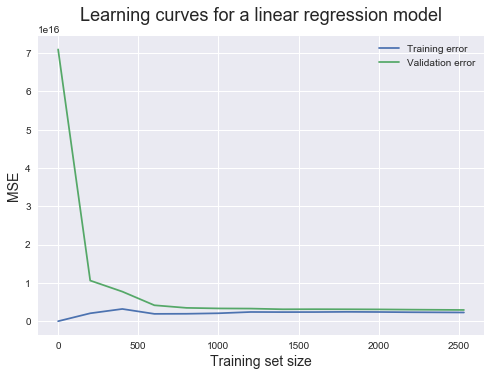

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set_new, train_scores_mean, label = 'Training error')
plt.plot(train_set_new, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

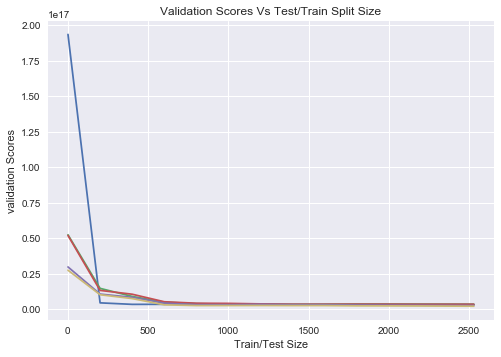

In [105]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

# END